In [108]:
### Install Packages
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
import math

In [ ]:

## Avoid OOM Errors by setting GPU memory consumtion growth
"""This approach helps to avoid OOM errors by allowing TensorFlow to dynamically allocate GPU memory as needed,
 which is particularly useful in environments with limited GPU resources, like Google Colab. This code is designed to
 manage GPU memory usage in TensorFlow when running on a GPU-enabled environment like Google Colab. Let's break it down:"""

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

  """This block of code is essential for setting up your data access in Google Colab.
By mounting Google Drive, setting the data directory, and listing its contents, you prepare the environment to work with your image classification dataset.
This setup ensures that your data is correctly accessed from Google Drive, enabling smooth progress in your project."""

from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/colab_notebooks/ImageClassification/data'
os.listdir(data_dir)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['sad', 'happy']

In [109]:
image_exts = ['jpeg','jpg','bmp','png','gif','bmp']

In [ ]:
"""This code snippet is part of a data pre-processing pipeline for an image classification task.
 It loops through each image in the dataset, verifies that each image is of an expected type, and removes any that are not.
 The try-except block ensures that any issues encountered during image processing are handled gracefully, without crashing the program.
 This data cleaning step is crucial for ensuring that only valid images are passed to the neural network for training, improving the model's performance
 and robustness."""

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
  try:
    img = cv2.imread(image_path)
    tip = imghdr.what(image_path)
    if tip not in image_exts:
      print('Image not in ext list {}'.format(image_path))
      os.remove(image_path)
  except Exception as e:
    print('Issue with image {}'.format(image_path))
    # os.remove(image_pth)

In [110]:
from google.colab import drive
import os
import cv2
import imghdr

# Mount Google Drive
drive.mount('/content/drive')

# Set the directory path
data_dir = '/content/drive/MyDrive/colab_notebooks/ImageClassification/data'

# List of acceptable image formats
image_exts = ['jpeg', 'jpg', 'bmp', 'png', 'gif']

# Check each image in the directory
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        try:
            # Attempt to read the image
            img = cv2.imread(image_path)

            # Check the image file format
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}: {}'.format(image_path, e))
            # Uncomment the following line to remove the problematic image
            # os.remove(image_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
"""tf.keras.utils.image_dataset_from_directory:
What it does: This function is a utility provided by TensorFlow's Keras API to load images from a directory structure and automatically label them based on the folder names. It creates a tf.data.Dataset object that is ready to be used in training deep learning models.
Key Features:
Automatic Labeling: The function automatically labels images based on the directory structure.
Images in the happy folder will be labeled with one class, and images in the sad folder will be labeled with another class.
Data Preparation: The function handles important preprocessing tasks such as resizing the images to a uniform size, shuffling the data, batching it, and potentially splitting it into training and validation sets.
"""
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/colab_notebooks/ImageClassification/data')


Found 517 files belonging to 2 classes.


In [112]:
"""•	for images, labels in data.take(1):: This line extracts a single batch of images and their corresponding labels from the dataset.
•	print(images.shape): Prints the shape of the images tensor, which tells you how many images are in the batch and their dimensions.
•	print(labels.shape): Prints the shape of the labels tensor, which confirms the number of labels corresponding to the images.
•	print(labels): Prints the actual labels for the images in the batch, allowing you to see which class each image belongs to."""

for images,labels in data.take(1):
  print(images.shape)
  print(labels.shape)
  print(labels)

(32, 256, 256, 3)
(32,)
tf.Tensor([0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0], shape=(32,), dtype=int32)


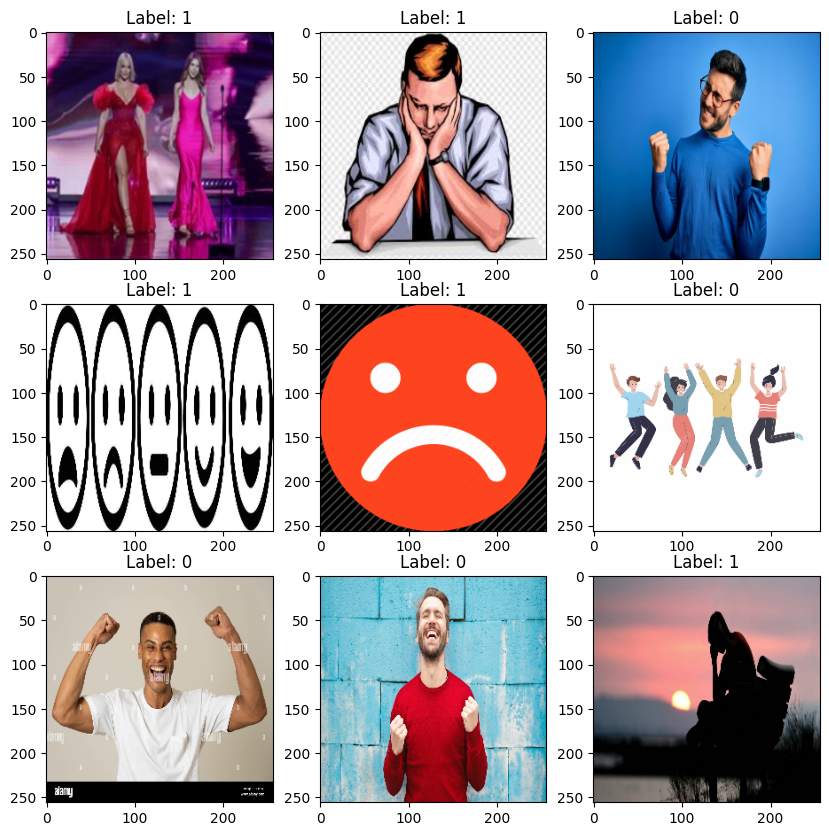

In [113]:
#example of showing images in one of the batches (take1)
plt.figure(figsize=(10,10))
for images,labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype(int))
    plt.title(f'Label: {labels[i].numpy()}')
    plt.axis("on")

plt.show()

In [114]:
# In order to find the number of batches that were created, it can be done by using one of the methods:

# Method 1: Count the number of batches by iterating through the dataset
num_batches = 0
for batch in data:
    num_batches += 1
print(f'Total number of batches: {num_batches}')

# Method 2: Using cardinality() to get the number of batches
#num_batches = tf.data.experimental.cardinality(data).numpy()
#print(f'Total number of batches: {num_batches}')

# Method 3: Calculating manually (if you know the total number of images)
#total_images = len(data.file_paths)  # If the dataset provides this attribute
#batch_size = 32  # Or whatever batch size you used
#num_batches = math.ceil(total_images / batch_size)
#print(f'Total number of batches: {num_batches}')

Total number of batches: 17


In [115]:
#
#converting data from tensor to numpy.
data_iterator = data.as_numpy_iterator()
#create a batch
batch = data_iterator.next()

In [116]:
images, labels = next(data_iterator)
print(images.shape)

(32, 256, 256, 3)


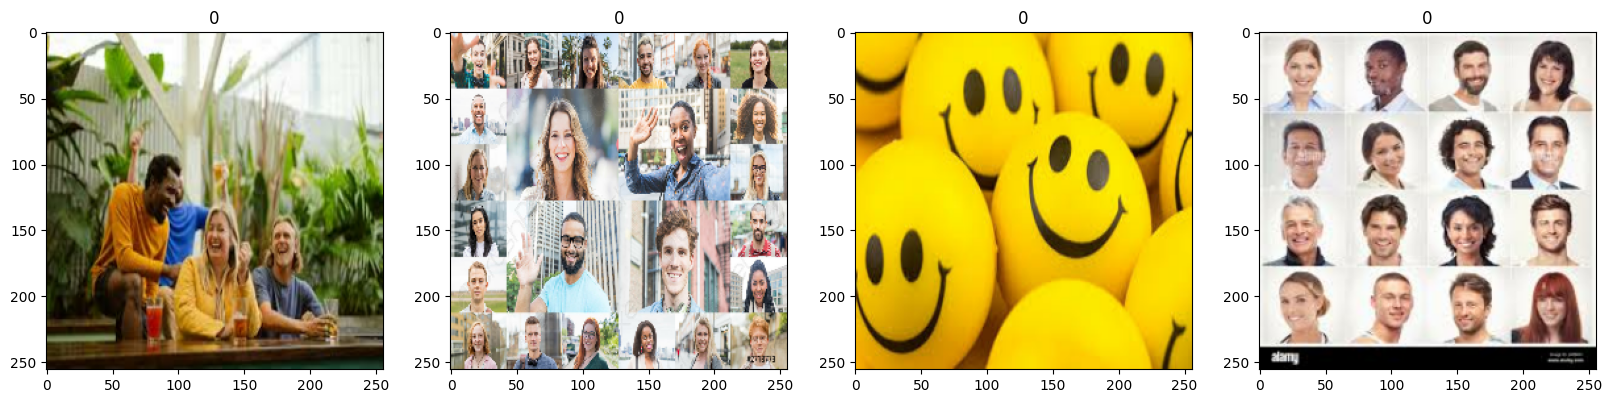

In [117]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [118]:
"""Normalize the Data: The code normalizes the pixel values of images in your dataset from the original range of 0 to 255
to a new range of 0 to 1, which is a common preprocessing step in machine learning.
Code Execution: The data.map(lambda x, y: (x / 255, y)) function applies this normalization to every image in the dataset while leaving the labels unchanged.
Purpose: This normalization step is essential for improving the model's learning process and ensuring that the input data is
scaled appropriately for the model to handle."""

data = data.map(lambda x,y:(x/255,y))

In [119]:
print(f'The MAX Value of each image is {data.as_numpy_iterator().next()[0].max()}\nThe MIN Value of each image is {data.as_numpy_iterator().next()[0].min()}')

The MAX Value of each image is 1.0
The MIN Value of each image is 0.0


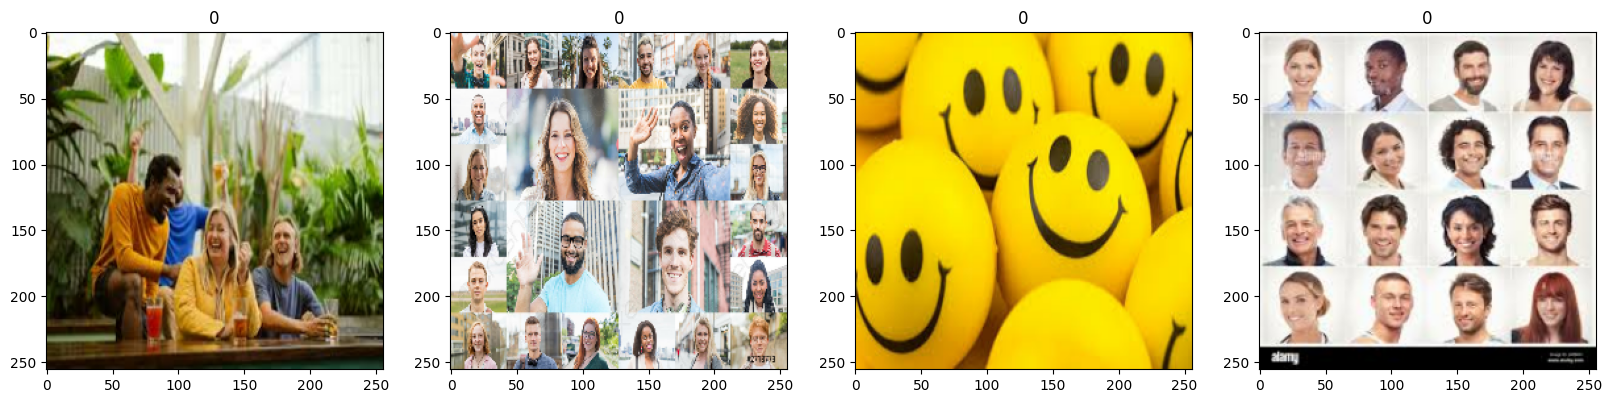

In [120]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [121]:
"""This code snippet is used to split a dataset into three parts: training, validation, and testing"""
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data) *0.1)+1

In [128]:
"""•	train: The first portion of the dataset, consisting of train_size samples, used to train the model.
   •	val: The middle portion of the dataset, consisting of val_size samples after the training set, used for validating the model during training.
   •	test: The last portion of the dataset, consisting of test_size samples after both the training and validation sets, used for testing the model's
   final performance."""

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [130]:
model = Sequential()

In [131]:
"""This sequence of layers defines a Convolutional Neural Network (CNN) designed for binary classification.
It starts with several convolutional layers for feature extraction, followed by max-pooling layers to downsample the feature maps,
a flattening layer to prepare the data for fully connected layers, and ends with a dense layer that outputs the final prediction.
Each layer has a specific role, contributing to the model's ability to learn and make accurate predictions."""

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
"""model.compile(): This method sets up the model with the necessary configurations for training.
'adam': Specifies the Adam optimizer, which adapts learning rates and is generally effective across a wide range of problems.
loss=tf.losses.BinaryCrossentropy(): Sets the loss function to binary crossentropy, ideal for binary classification tasks to
measure how well the model’s predictions match the actual labels.
metrics=['accuracy']: Uses accuracy as the performance metric, which provides a straightforward measure of how many predictions the model gets right.
This configuration prepares the model to be trained effectively on a binary classification task, where the model will learn by minimizing the binary crossentropy
loss and its performance will be monitored using accuracy."""

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [133]:
"""The output you provided is the summary of a Convolutional Neural Network (CNN) model generated by the model.summary() function in Keras.
This summary provides detailed information about each layer in the model, including the type of layer,
the shape of the output, and the number of parameters (weights) involved."""

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
logdir='logs'

In [135]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [136]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5533 - loss: 0.6994 - val_accuracy: 0.6797 - val_loss: 0.6423
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.7071 - loss: 0.6482 - val_accuracy: 0.7031 - val_loss: 0.5821
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.7505 - loss: 0.5519 - val_accuracy: 0.7266 - val_loss: 0.5560
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.7590 - loss: 0.4708 - val_accuracy: 0.8594 - val_loss: 0.3434
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8081 - loss: 0.4081 - val_accuracy: 0.8594 - val_loss: 0.3515
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8948 - loss: 0.2962 - val_accuracy: 0.8906 - val_loss: 0.2879
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8952 - loss: 0.2267 - val_accuracy: 0.9531 - val_loss: 0.1730
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9533 - loss: 0.1574 - val_accuracy: 0.9609 - val_loss:

In [141]:
hist.history

{'accuracy': [0.5511363744735718,
  0.6875,
  0.7301136255264282,
  0.7670454382896423,
  0.8210227489471436,
  0.8806818127632141,
  0.8920454382896423,
  0.9517045617103577,
  0.9545454382896423,
  0.9375,
  0.9573863744735718,
  0.9857954382896423,
  0.9801136255264282,
  0.9886363744735718,
  0.9886363744735718,
  0.9943181872367859,
  0.9886363744735718,
  0.9914772510528564,
  1.0,
  0.9914772510528564],
 'loss': [0.703344464302063,
  0.6411567330360413,
  0.5500016808509827,
  0.46205541491508484,
  0.39528149366378784,
  0.30935636162757874,
  0.23233337700366974,
  0.16782143712043762,
  0.17262901365756989,
  0.15737693011760712,
  0.14125262200832367,
  0.07403972744941711,
  0.05385878309607506,
  0.040394894778728485,
  0.03966468200087547,
  0.04614520072937012,
  0.026592422276735306,
  0.03251296654343605,
  0.010714265517890453,
  0.043099042028188705],
 'val_accuracy': [0.6796875,
  0.703125,
  0.7265625,
  0.859375,
  0.859375,
  0.890625,
  0.953125,
  0.9609375,
  

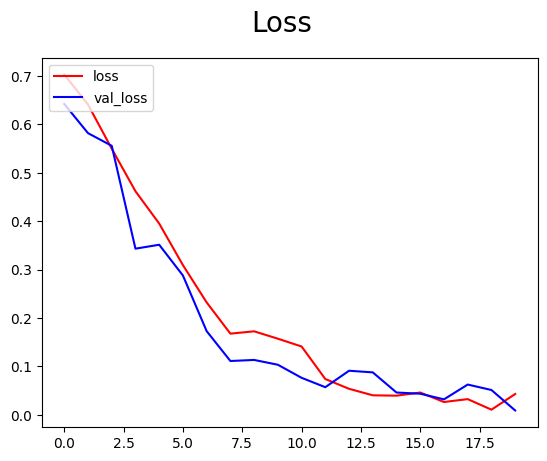

In [143]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

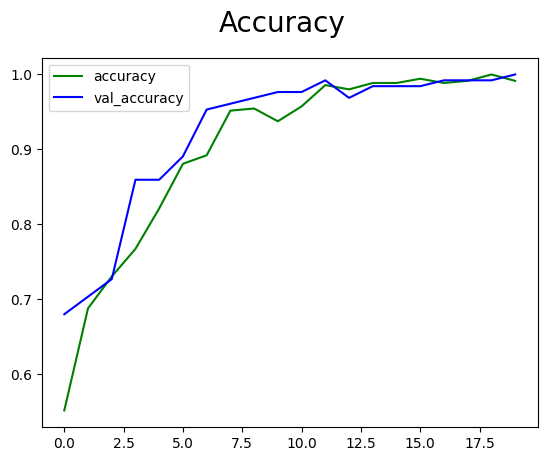

In [144]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [146]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [147]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [148]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


In [149]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision:1.0, Recall:1.0, Accuracy: 1.0


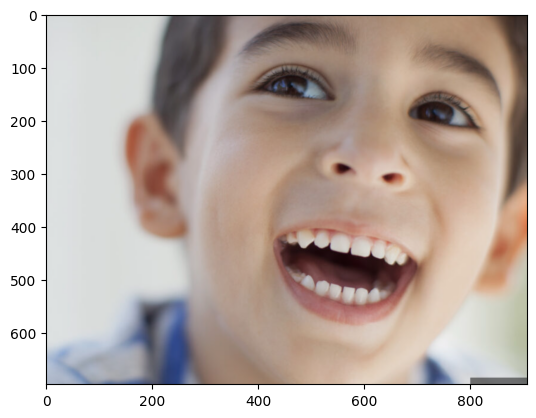

In [192]:
import cv2

directory_path = '/content/drive/MyDrive/colab_notebooks/ImageClassification/U_Test_Images'
new_image = os.path.join(directory_path,'happy1.jpg')

img = cv2.imread(new_image)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

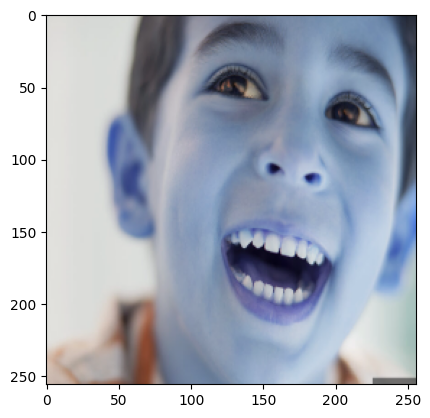

In [193]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [194]:
np.expand_dims(resize,0)

array([[[[216.      , 217.      , 214.27344 ],
         [217.      , 218.      , 215.      ],
         [217.      , 218.      , 215.      ],
         ...,
         [ 38.632812,  43.632812,  57.      ],
         [ 37.      ,  44.15512 ,  55.      ],
         [ 40.099335,  45.726562,  56.726562]],

        [[216.      , 217.      , 214.27344 ],
         [217.      , 218.      , 215.      ],
         [217.      , 218.      , 215.      ],
         ...,
         [ 38.632812,  43.632812,  57.      ],
         [ 37.      ,  44.663544,  55.483856],
         [ 39.298004,  44.726562,  55.726562]],

        [[216.3164  , 217.3164  , 214.50333 ],
         [217.25955 , 218.      , 214.74045 ],
         [217.63281 , 218.      , 214.6836  ],
         ...,
         [ 39.11618 ,  43.865173,  57.11618 ],
         [ 38.193573,  44.683594,  56.316406],
         [ 39.      ,  44.      ,  56.316406]],

        ...,

        [[202.72656 , 186.72656 , 176.      ],
         [202.      , 185.17969 , 175.17969 ]

In [195]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [196]:
yhat

array([[0.55545443]], dtype=float32)

In [197]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
